<a href="https://colab.research.google.com/github/kainight0/HWProj/blob/main/ConvnetLayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST convnet model with first Dense Layer**

In [233]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [234]:
X_train.shape

(60000, 28, 28)

In [235]:
y_train.shape

(60000,)

In [236]:
X_test.shape

(10000, 28, 28)

In [237]:
y_test.shape

(10000,)

In [238]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

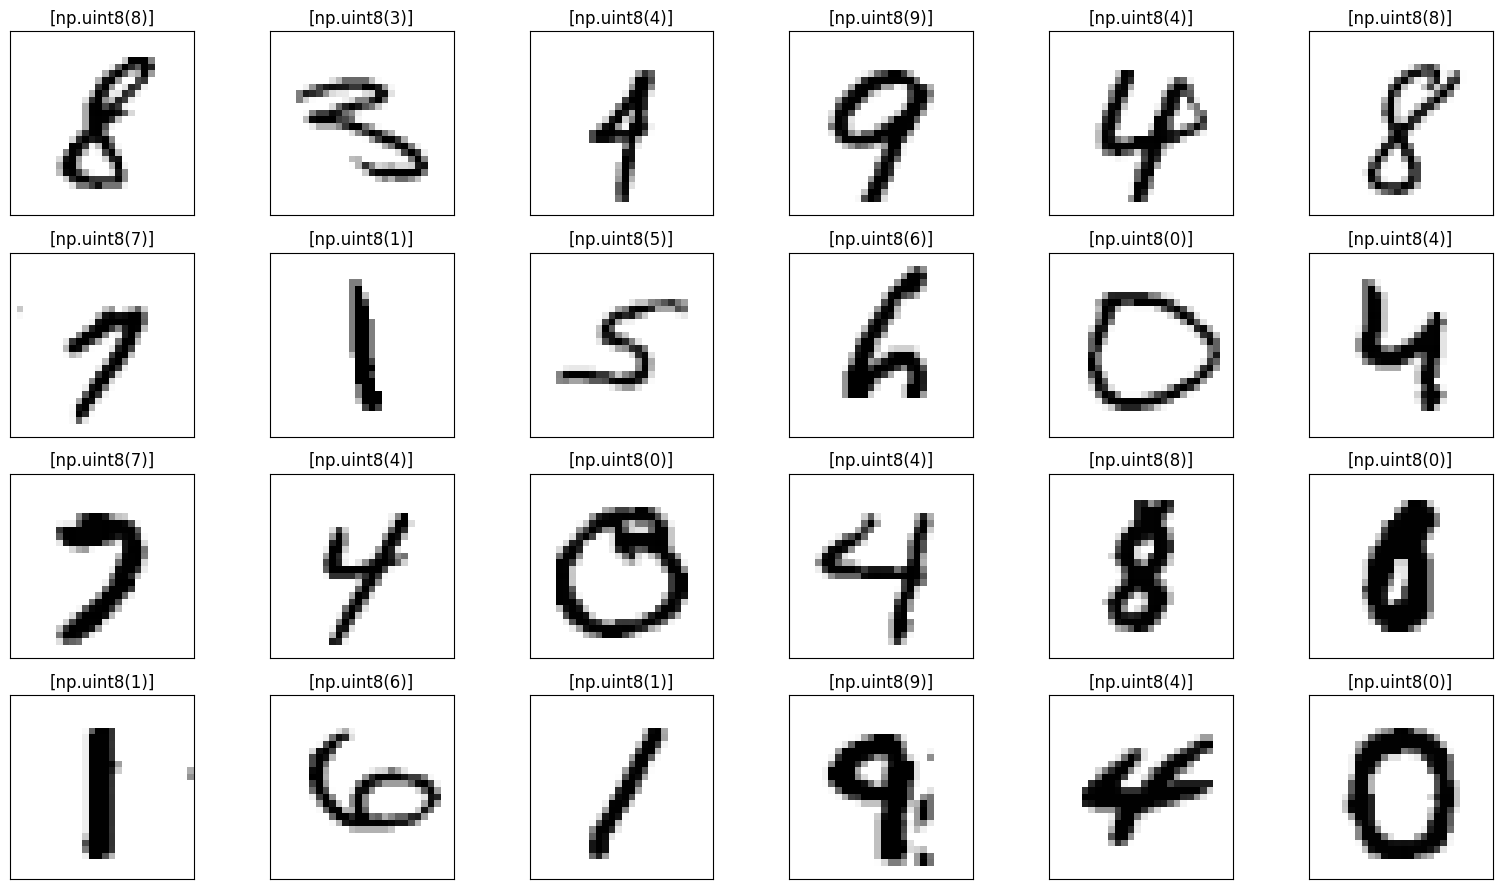

In [239]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 28, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title([target])

plt.tight_layout()

In [240]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_train.shape

(60000, 28, 28, 1)

In [241]:
X_test = X_test.reshape((10000, 28, 28, 1))
X_test.shape

(10000, 28, 28, 1)

In [242]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [243]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)

In [244]:
y_train.shape

(60000, 10)

In [245]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [246]:

y_test = to_categorical(y_test)

In [247]:
y_test.shape

(10000, 10)

In [248]:
from tensorflow.keras.models import Sequential
cnn = Sequential()

In [249]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [250]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [251]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [252]:
cnn.add(Flatten())

In [253]:
cnn.add(Dense(units=10, activation='softmax'))

In [254]:
cnn.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │       216,330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 217,610 (850.04 KB)

 Trainable params: 217,610 (850.04 KB)

 Non-trainable params: 0 (0.00 B)

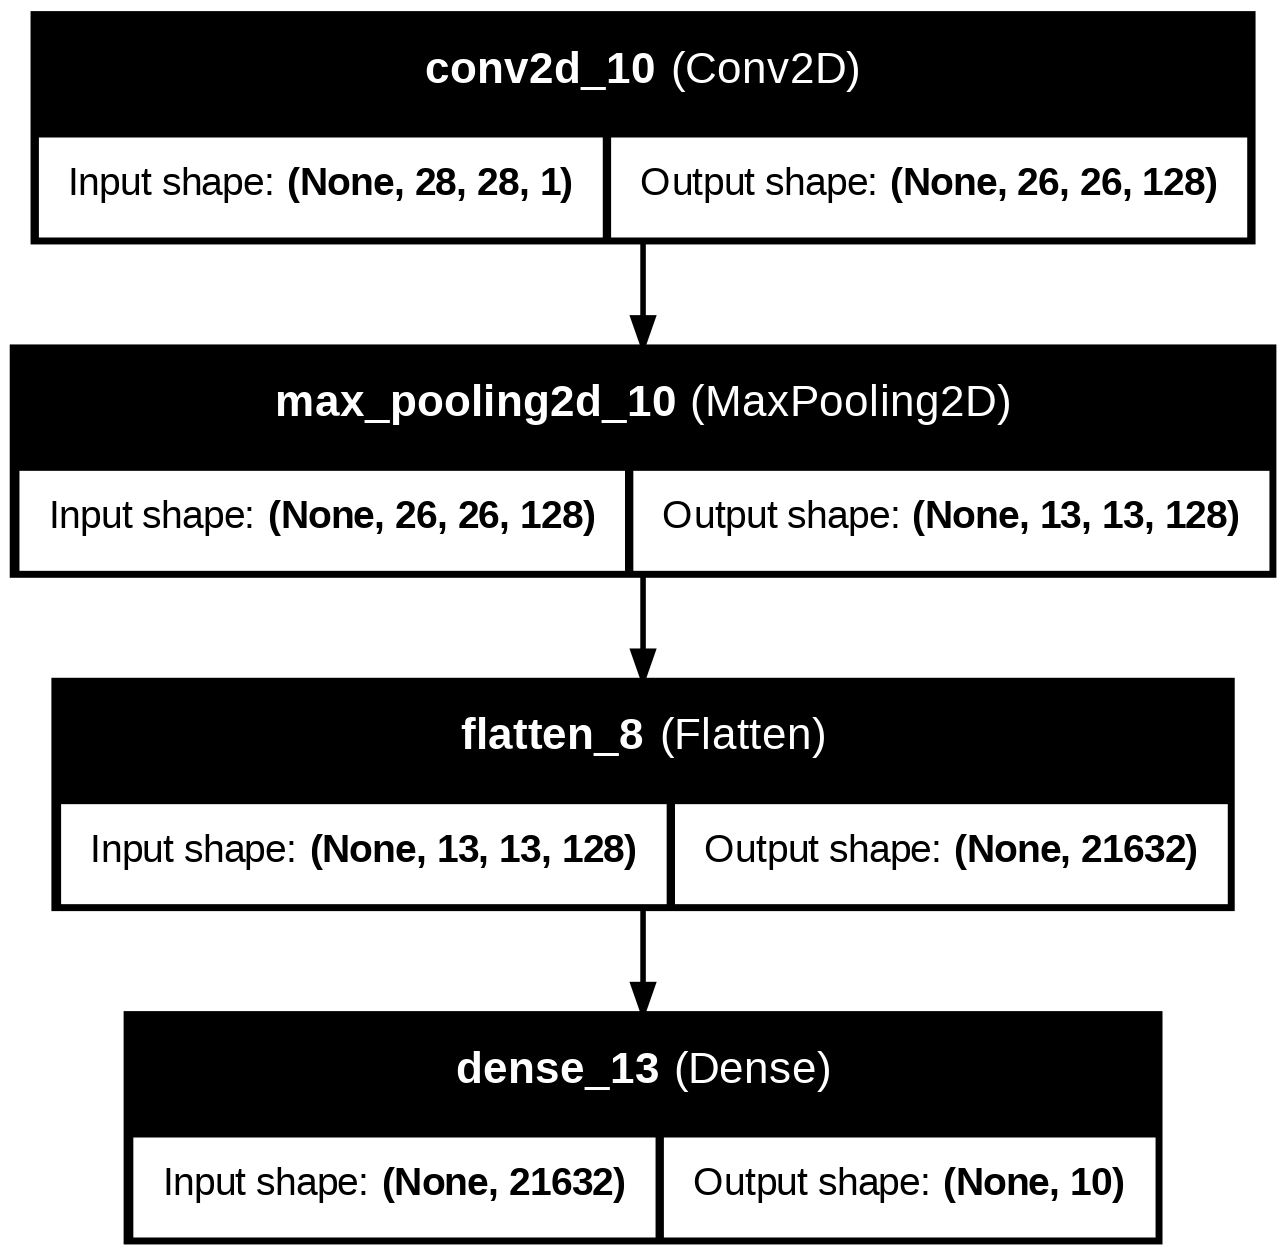

In [255]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True,
           show_layer_names=True)
Image(filename='convnet.png')

In [256]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [257]:
import time
start_time = time.time()

cnn.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=2
)

end_time = time.time()

Epoch 1/10
375/375 - 4s - 12ms/step - accuracy: 0.9236 - loss: 0.2748 - val_accuracy: 0.9737 - val_loss: 0.1014
Epoch 2/10
375/375 - 2s - 6ms/step - accuracy: 0.9751 - loss: 0.0876 - val_accuracy: 0.9787 - val_loss: 0.0746
Epoch 3/10
375/375 - 2s - 6ms/step - accuracy: 0.9819 - loss: 0.0623 - val_accuracy: 0.9796 - val_loss: 0.0683
Epoch 4/10
375/375 - 3s - 7ms/step - accuracy: 0.9850 - loss: 0.0508 - val_accuracy: 0.9813 - val_loss: 0.0620
Epoch 5/10
375/375 - 2s - 6ms/step - accuracy: 0.9874 - loss: 0.0428 - val_accuracy: 0.9799 - val_loss: 0.0670
Epoch 6/10
375/375 - 2s - 6ms/step - accuracy: 0.9895 - loss: 0.0362 - val_accuracy: 0.9815 - val_loss: 0.0612
Epoch 7/10
375/375 - 2s - 6ms/step - accuracy: 0.9909 - loss: 0.0317 - val_accuracy: 0.9817 - val_loss: 0.0585
Epoch 8/10
375/375 - 2s - 6ms/step - accuracy: 0.9920 - loss: 0.0275 - val_accuracy: 0.9839 - val_loss: 0.0592
Epoch 9/10
375/375 - 2s - 7ms/step - accuracy: 0.9929 - loss: 0.0240 - val_accuracy: 0.9830 - val_loss: 0.0578


In [258]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9823 - loss: 0.0666


In [259]:
loss

0.05447383597493172

In [260]:
accuracy

0.9842000007629395

In [261]:
#The accuracy was slightly lower than the original

**MNIST model with added Dense layer**

In [262]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [263]:
X_train.shape

(60000, 28, 28)

In [264]:
y_train.shape

(60000,)

In [265]:
X_test.shape

(10000, 28, 28)

In [266]:
y_test.shape

(10000,)

In [267]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

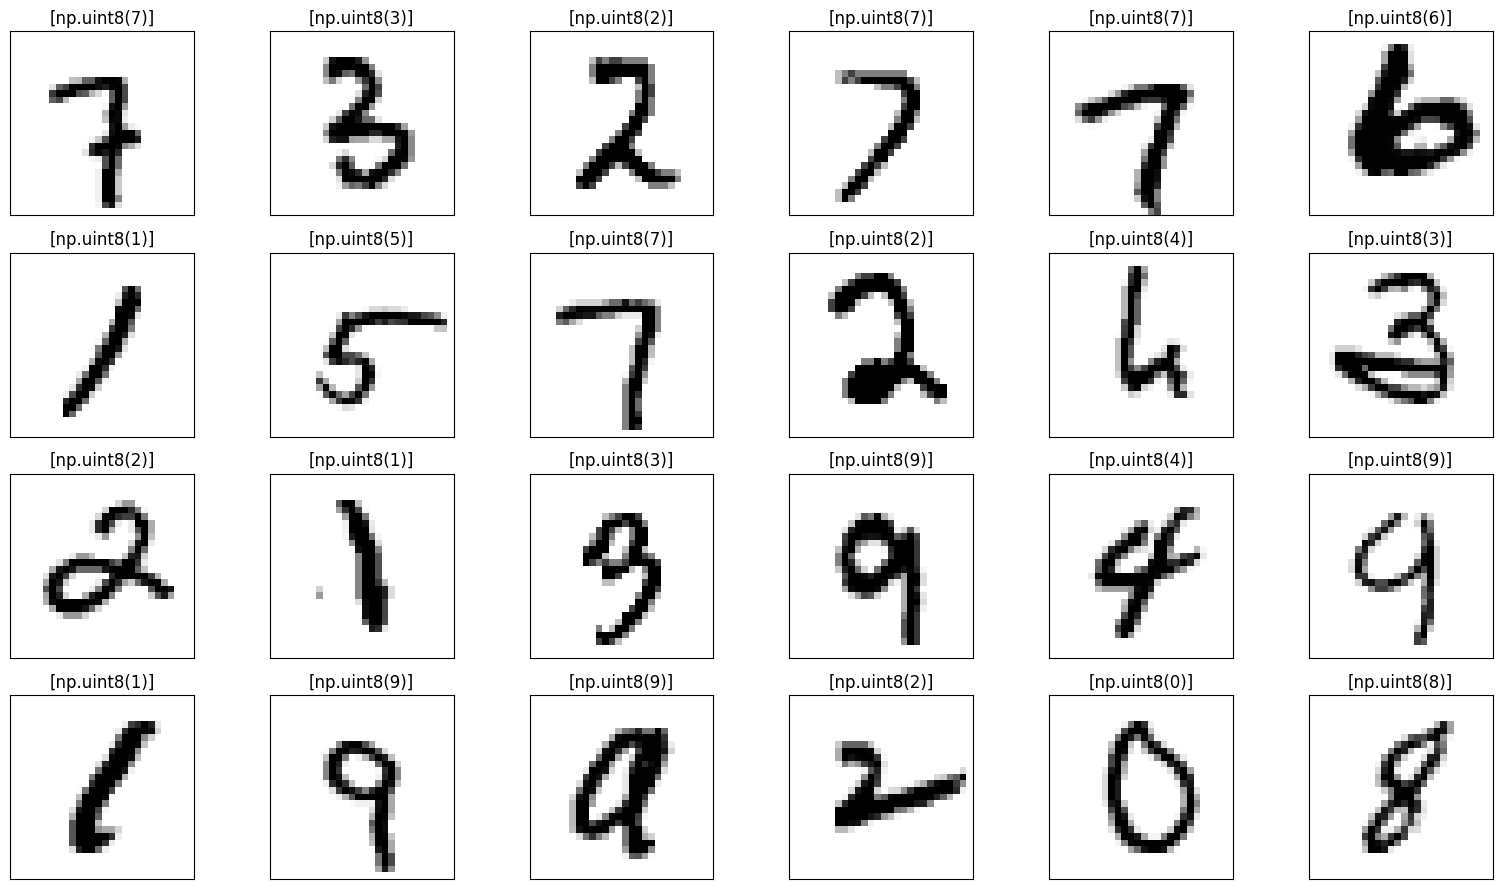

In [268]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 28, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title([target])

plt.tight_layout()

In [269]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_train.shape

(60000, 28, 28, 1)

In [270]:
X_test = X_test.reshape((10000, 28, 28, 1))
X_test.shape

(10000, 28, 28, 1)

In [271]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [272]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)

In [273]:
y_train.shape

(60000, 10)

In [274]:
y_test = to_categorical(y_test)

In [275]:
y_test.shape

(10000, 10)

In [276]:
from tensorflow.keras.models import Sequential
cnn = Sequential()

In [277]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [278]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
               input_shape=(28, 28, 1)))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [279]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [280]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [281]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [282]:
cnn.add(Flatten())

In [283]:
cnn.add(Dense(units=4096, activation='relu'))

In [284]:
cnn.add(Dense(units=128, activation='relu'))

In [285]:
cnn.add(Dense(units=10, activation='softmax'))

In [286]:
cnn.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 4096)           │    13,111,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,711,498 (52.31 MB)

 Trainable params: 13,711,498 (52.31 MB)

 Non-trainable params: 0 (0.00 B)

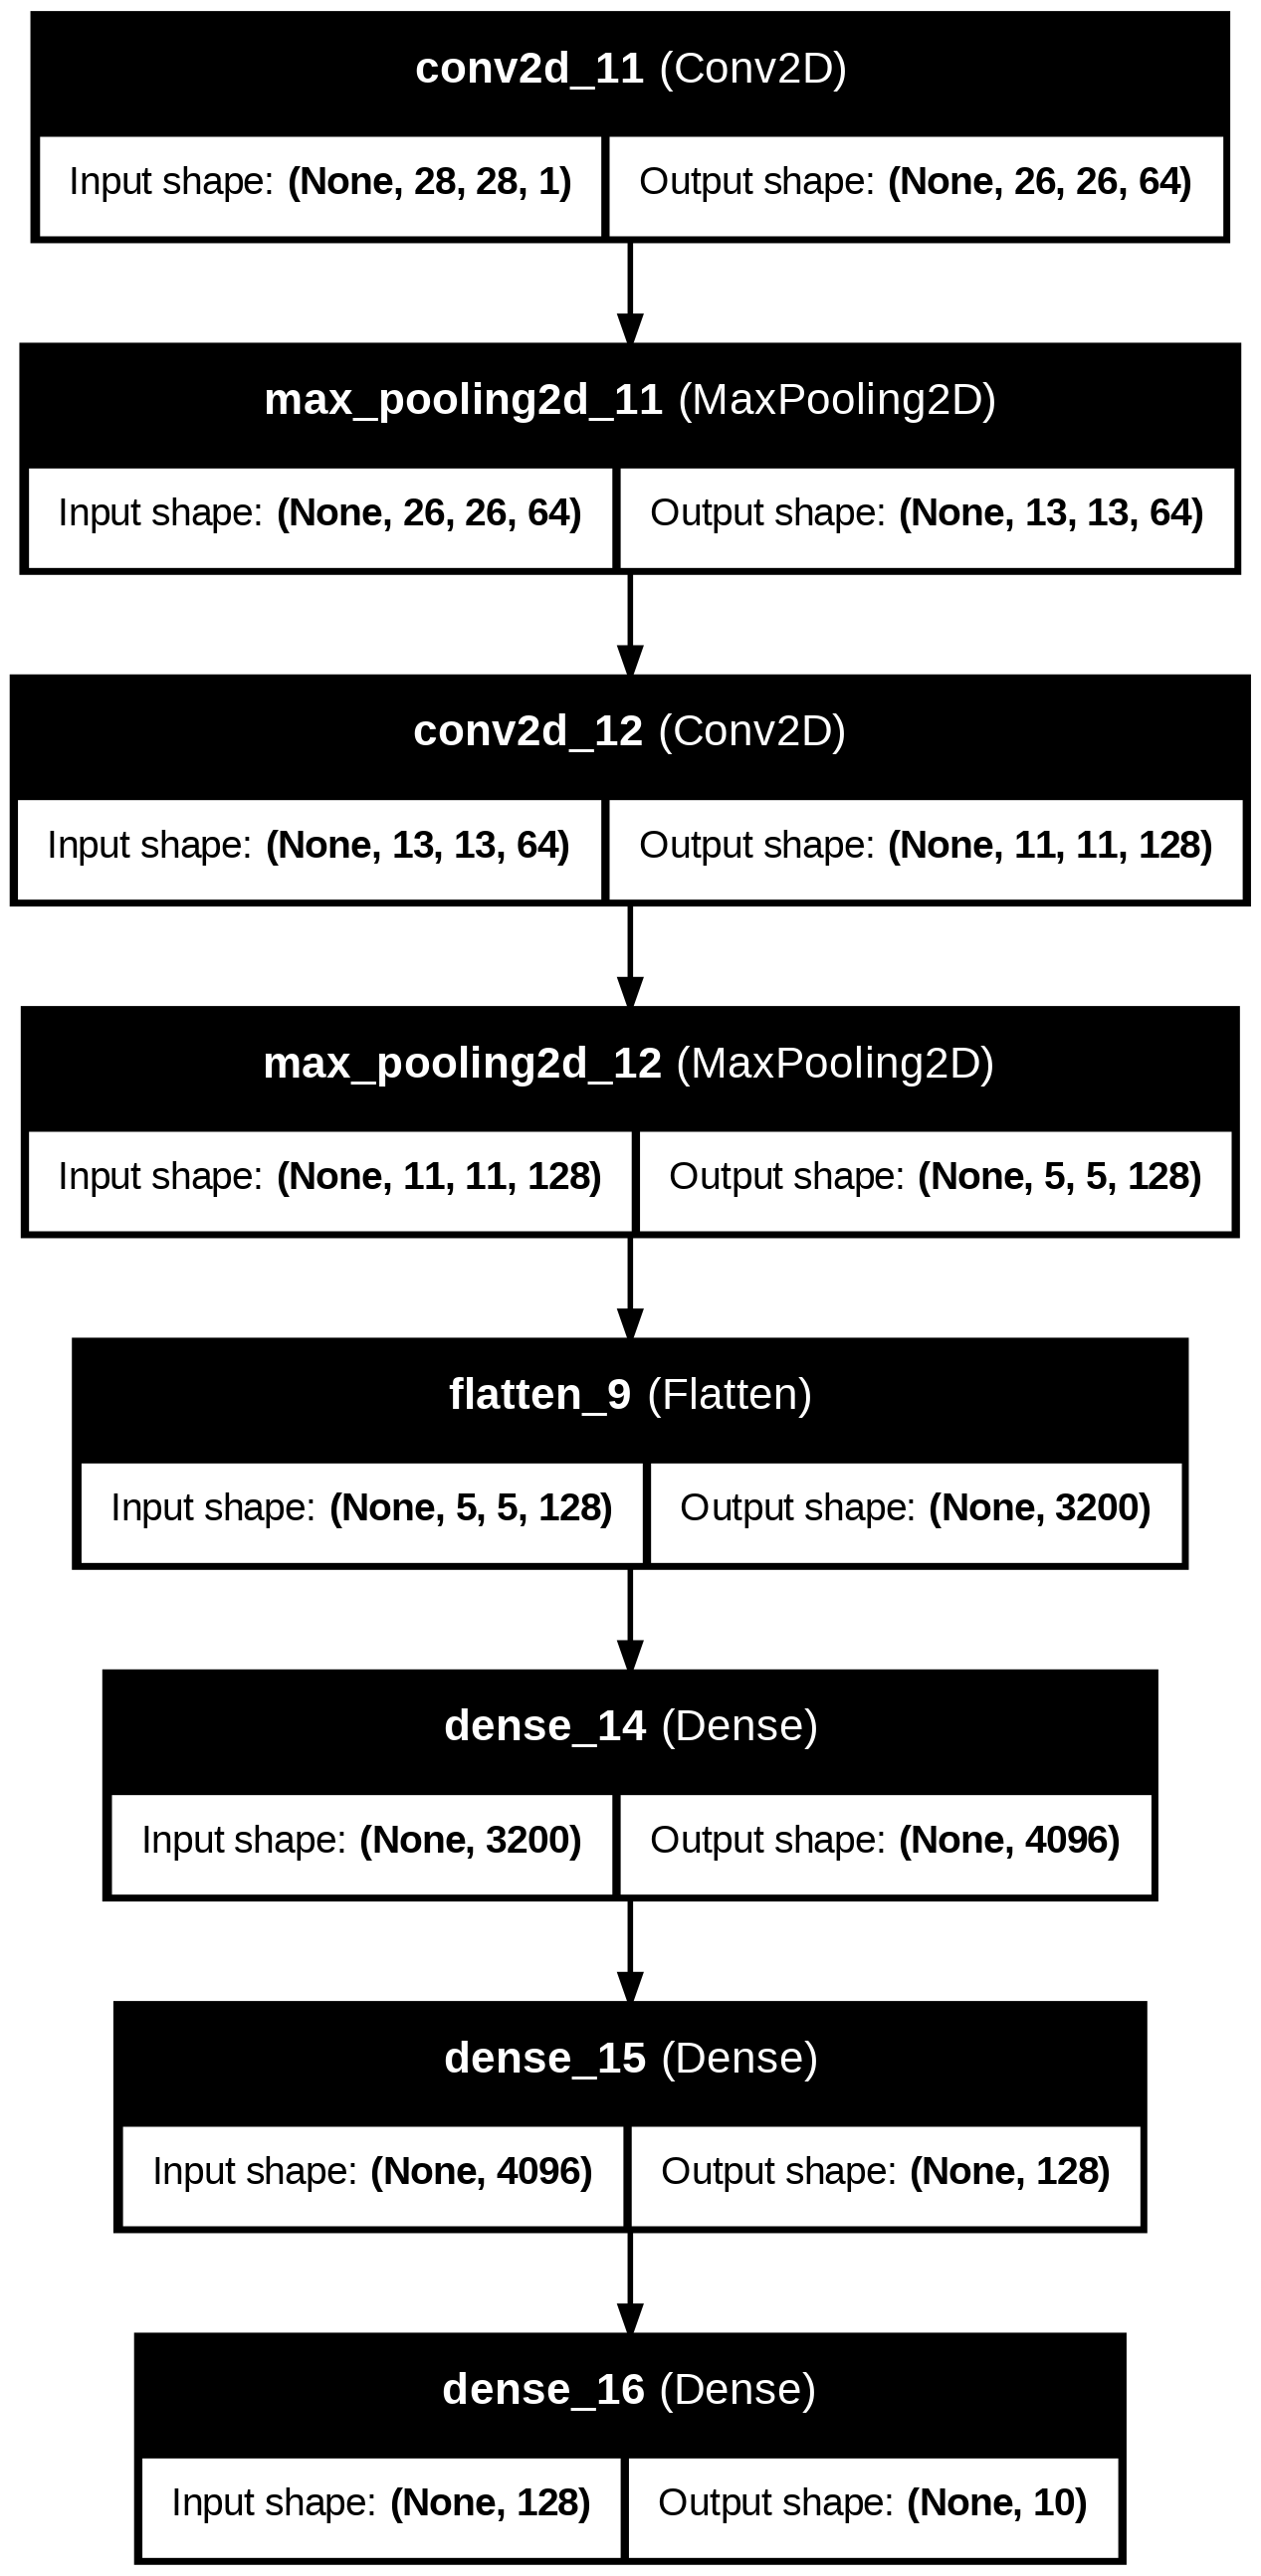

In [287]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True,
           show_layer_names=True)
Image(filename='convnet.png')

In [288]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [289]:
start_time2 = time.time()

cnn.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=2
)

end_time2 = time.time()

Epoch 1/10
375/375 - 7s - 20ms/step - accuracy: 0.9523 - loss: 0.1510 - val_accuracy: 0.9852 - val_loss: 0.0494
Epoch 2/10
375/375 - 4s - 10ms/step - accuracy: 0.9879 - loss: 0.0396 - val_accuracy: 0.9858 - val_loss: 0.0470
Epoch 3/10
375/375 - 4s - 10ms/step - accuracy: 0.9916 - loss: 0.0269 - val_accuracy: 0.9893 - val_loss: 0.0379
Epoch 4/10
375/375 - 4s - 10ms/step - accuracy: 0.9947 - loss: 0.0162 - val_accuracy: 0.9898 - val_loss: 0.0394
Epoch 5/10
375/375 - 4s - 10ms/step - accuracy: 0.9957 - loss: 0.0127 - val_accuracy: 0.9867 - val_loss: 0.0476
Epoch 6/10
375/375 - 4s - 10ms/step - accuracy: 0.9955 - loss: 0.0130 - val_accuracy: 0.9898 - val_loss: 0.0411
Epoch 7/10
375/375 - 4s - 10ms/step - accuracy: 0.9963 - loss: 0.0108 - val_accuracy: 0.9883 - val_loss: 0.0467
Epoch 8/10
375/375 - 4s - 10ms/step - accuracy: 0.9975 - loss: 0.0078 - val_accuracy: 0.9912 - val_loss: 0.0359
Epoch 9/10
375/375 - 4s - 10ms/step - accuracy: 0.9975 - loss: 0.0081 - val_accuracy: 0.9892 - val_loss:

In [290]:
loss2, accuracy2 = cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9892 - loss: 0.0409


In [291]:
loss2

0.030671484768390656

In [292]:
accuracy2

0.9919000267982483

In [293]:
print('The accuracy with the removed Dense layer: ', accuracy)
print('The accuracy with the added Dense layer: ', accuracy2)
print(f'The time with the removed Dense layer: {end_time - start_time} seconds')
print(f'The time with the added Dense Layer: {end_time2 - start_time2} seconds' )

The accuracy with the removed Dense layer:  0.9842000007629395
The accuracy with the added Dense layer:  0.9919000267982483
The time with the removed Dense layer: 25.53488278388977 seconds
The time with the added Dense Layer: 42.51182413101196 seconds
